In [1]:
from utils.Dataset import Dataset
import numpy as np
import pandas as pd

In [ ]:
#Full dump
dataset = Dataset(lateralize=False, reduced=False)
dataset.preload_cache()
dataset.save_dump()

In [2]:
#Reduced dump
dataset_reduced = Dataset(lateralize=False, reduced=True, n=500)
dataset_reduced.preload_cache()
dataset_reduced.save_dump("dump_cache_reduced.npz")


Preloading cache: 100%|██████████| 440/440 [00:08<00:00, 52.01it/s]


In [ ]:
# import sys
# is_colab = 'google.colab' in sys.modules

In [ ]:
# print("is_colab: ",is_colab)

In [3]:
dataset_reduced_half = Dataset(lateralize=False, reduced=True, n=5000)
dataset_reduced_half.preload_cache()
dataset_reduced_half.save_dump("dump_cache_reduced_quart.npz")

Preloading cache: 100%|██████████| 4514/4514 [01:15<00:00, 59.76it/s]


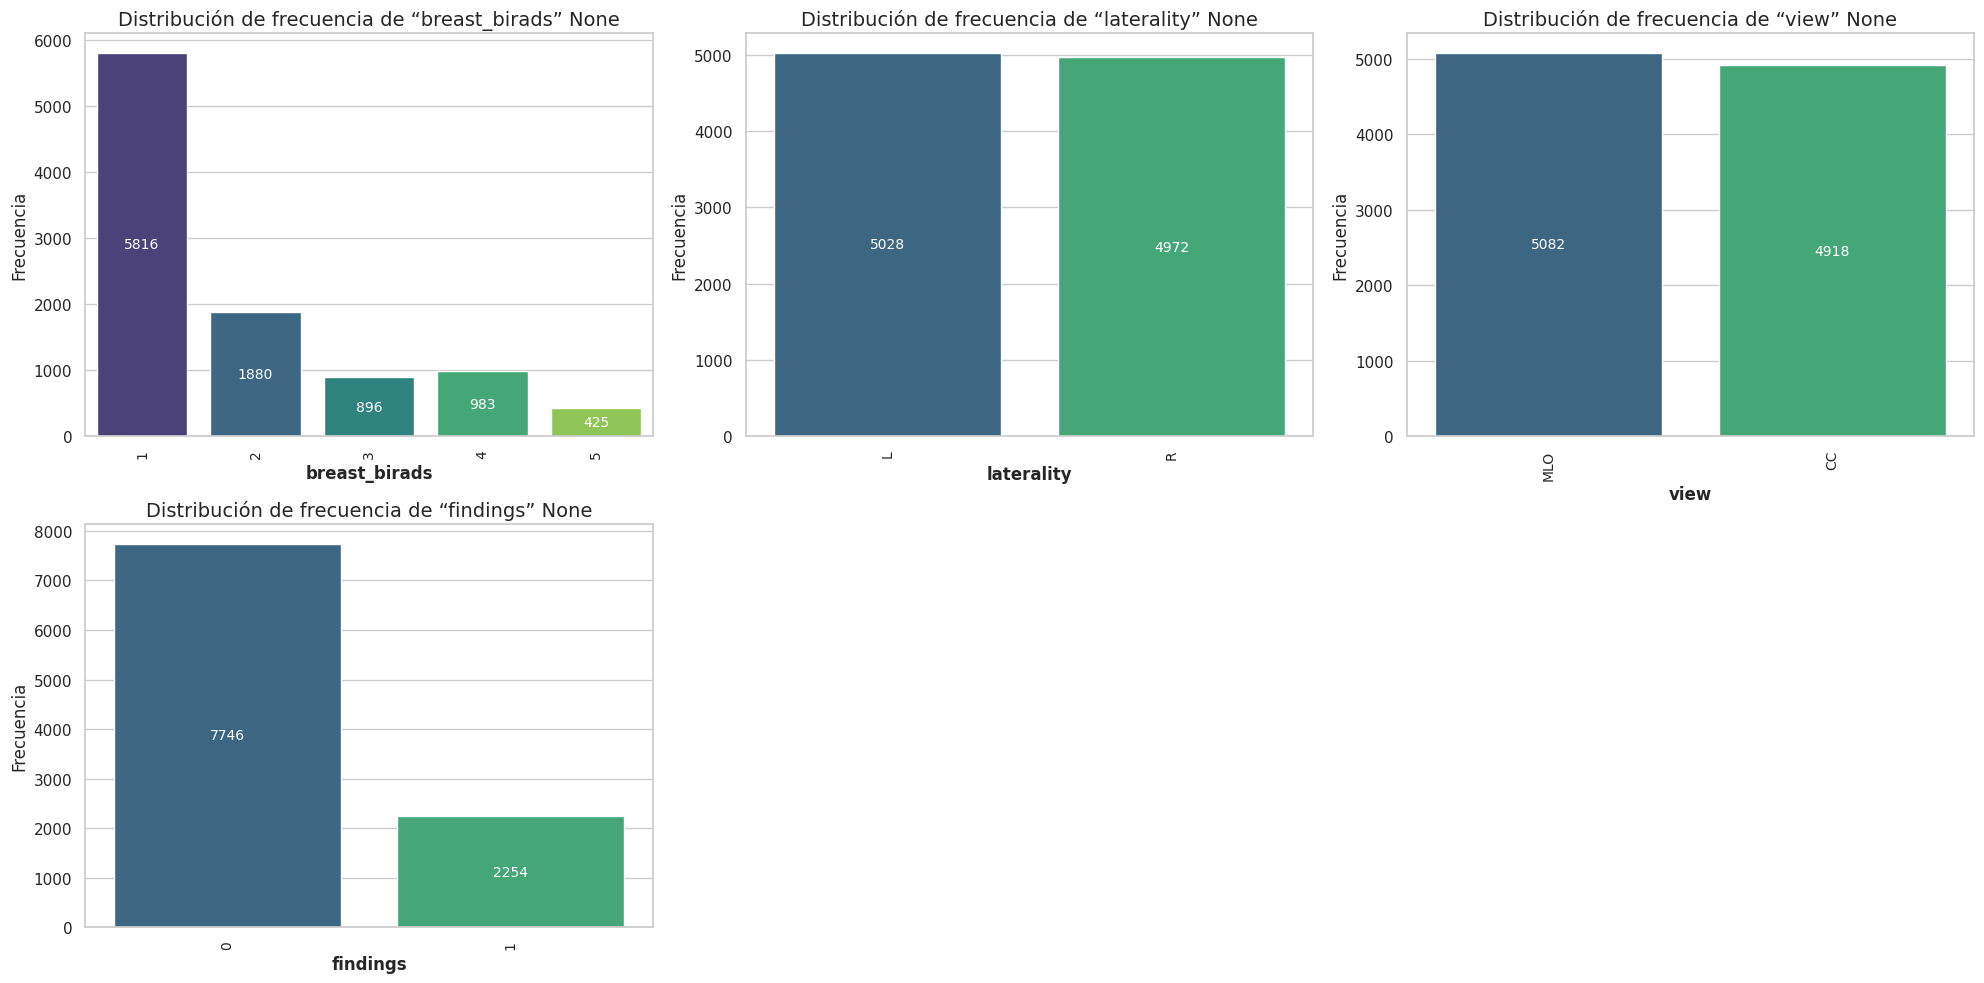

In [4]:
dataset_reduced_half.stats()

In [6]:
#Reduced dump
dataset_full = Dataset()
dataset_full.preload_cache()
dataset_full.save_dump("dump_cache_full.npz")

Preloading cache: 100%|██████████| 20000/20000 [02:26<00:00, 136.78it/s]


In [2]:
dataset_balanced =  Dataset()

In [3]:
dataset_balanced_training = dataset_balanced[dataset_balanced["split"]=="training"]

In [4]:
dataset_balanced_training[dataset_balanced_training["findings"]==1]

,laterality,view,breast_birads,finding_birads,split,xmin,ymin,xmax,ymax,path,findings
0,R,CC,4,4,training,485.695624,985.773942,609.595900,1078.419728,utils/images_original/48575a27b7c992427041a82f...,1
1,R,MLO,4,4,training,532.399692,743.812744,639.422675,812.095390,utils/images_original/48575a27b7c992427041a82f...,1
2,R,CC,3,3,training,368.152714,499.060222,816.519337,1287.129503,utils/images_original/75e8e48933289d70b407379a...,1
3,R,MLO,3,3,training,162.492921,726.730749,729.029452,1105.680056,utils/images_original/75e8e48933289d70b407379a...,1
4,R,CC,4,4,training,403.582493,1078.254802,580.267104,1203.183844,utils/images_original/c3487424fee1bdd4515b72dc...,1
...,...,...,...,...,...,...,...,...,...,...,...
2241,L,MLO,4,4,training,309.431246,611.283935,530.371715,815.673708,utils/images_original/7c98228fc11204260460934b...,1
2242,L,MLO,4,4,training,490.478823,600.463003,677.420142,717.937951,utils/images_original/7c98228fc11204260460934b...,1
2243,R,CC,3,3,training,784.773418,1042.754005,916.287879,1175.811148,utils/images_original/7c98228fc11204260460934b...,1
2252,L,MLO,4,4,training,71.254133,753.280013,737.398896,1184.495964,utils/images_original/0bfd4fcebaba4e9c4086edd0...,1


In [5]:
dataset_balanced_training[dataset_balanced_training["findings"]==0].head(1802)

,laterality,view,breast_birads,finding_birads,split,xmin,ymin,xmax,ymax,path,findings
2254,L,CC,2,<NA>,training,NaN,NaN,NaN,NaN,utils/images_original/b8d273e8601f348d3664778d...,0
2255,L,MLO,2,<NA>,training,NaN,NaN,NaN,NaN,utils/images_original/b8d273e8601f348d3664778d...,0
2256,R,CC,2,<NA>,training,NaN,NaN,NaN,NaN,utils/images_original/b8d273e8601f348d3664778d...,0
2257,R,MLO,2,<NA>,training,NaN,NaN,NaN,NaN,utils/images_original/b8d273e8601f348d3664778d...,0
2258,L,CC,1,<NA>,training,NaN,NaN,NaN,NaN,utils/images_original/8269f5971eaca3e5d3772d17...,0
...,...,...,...,...,...,...,...,...,...,...,...
4450,R,MLO,1,<NA>,training,NaN,NaN,NaN,NaN,utils/images_original/b9d9e040a3b805990f014d12...,0
4455,L,CC,1,<NA>,training,NaN,NaN,NaN,NaN,utils/images_original/f097ca9186599dab09007641...,0
4456,L,MLO,1,<NA>,training,NaN,NaN,NaN,NaN,utils/images_original/f097ca9186599dab09007641...,0
4457,R,CC,1,<NA>,training,NaN,NaN,NaN,NaN,utils/images_original/f097ca9186599dab09007641...,0


In [6]:
dataset_balanced_training_fix = pd.concat([dataset_balanced_training[dataset_balanced_training["findings"]==1], dataset_balanced_training[dataset_balanced_training["findings"]==0].head(1802)], ignore_index=True)

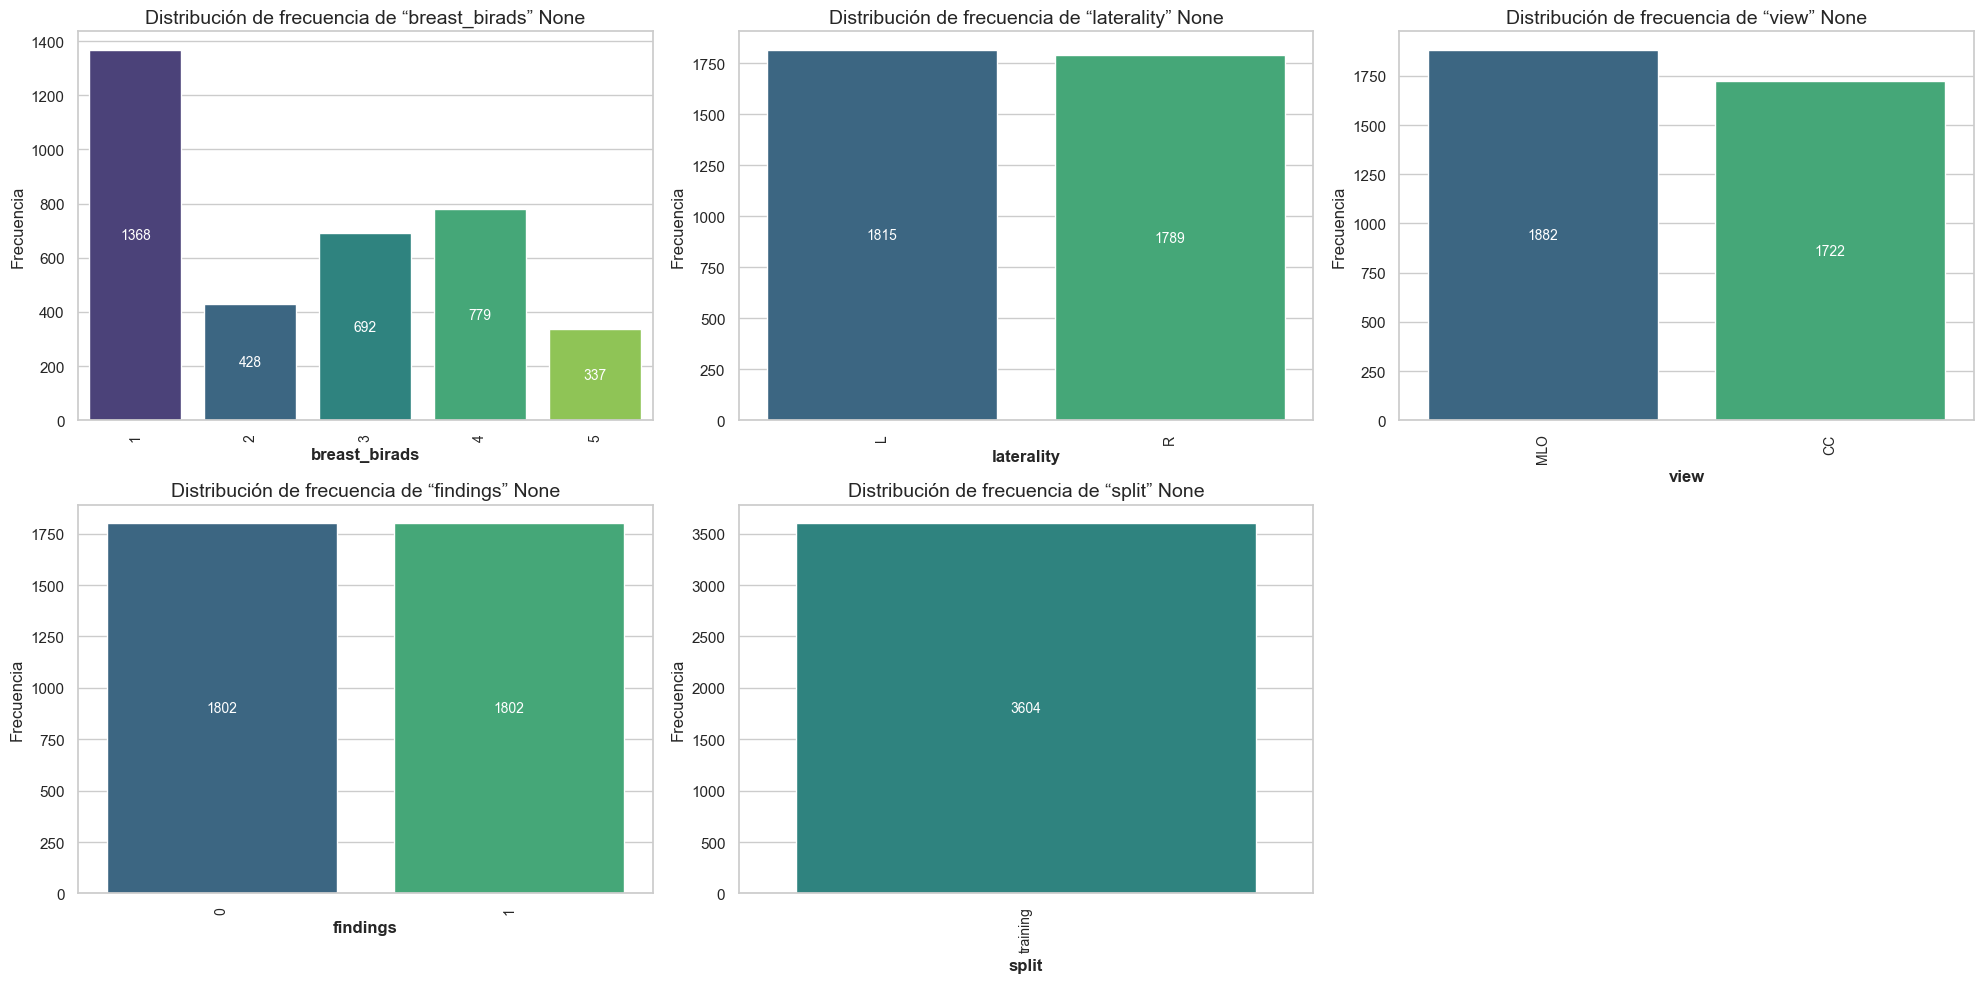

In [7]:
dataset_balanced_training_fix.stats()

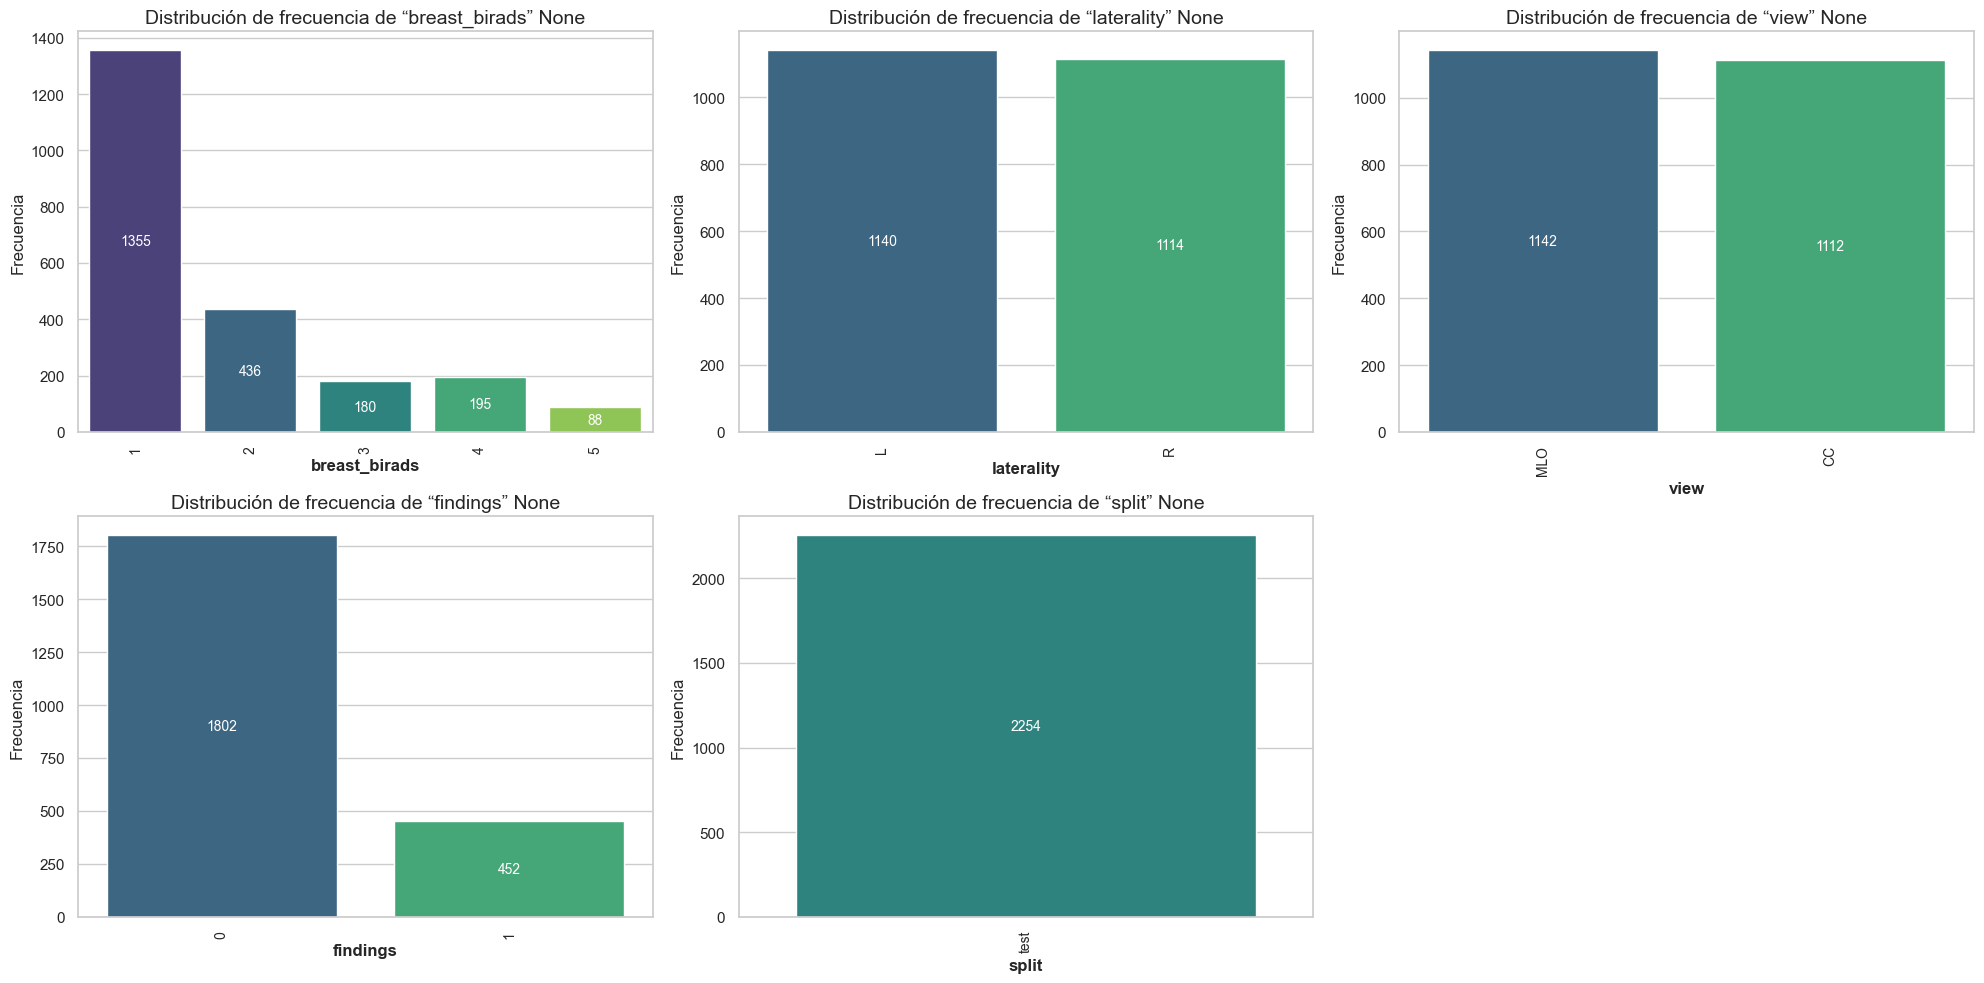

In [8]:
dataset_balanced_test = dataset_balanced[dataset_balanced["split"]=="test"]
dataset_balanced_test_fix = pd.concat([dataset_balanced_test[dataset_balanced_test["findings"]==1], dataset_balanced_test[dataset_balanced_test["findings"]==0].head(1802)], ignore_index=True)
dataset_balanced_test_fix.stats()


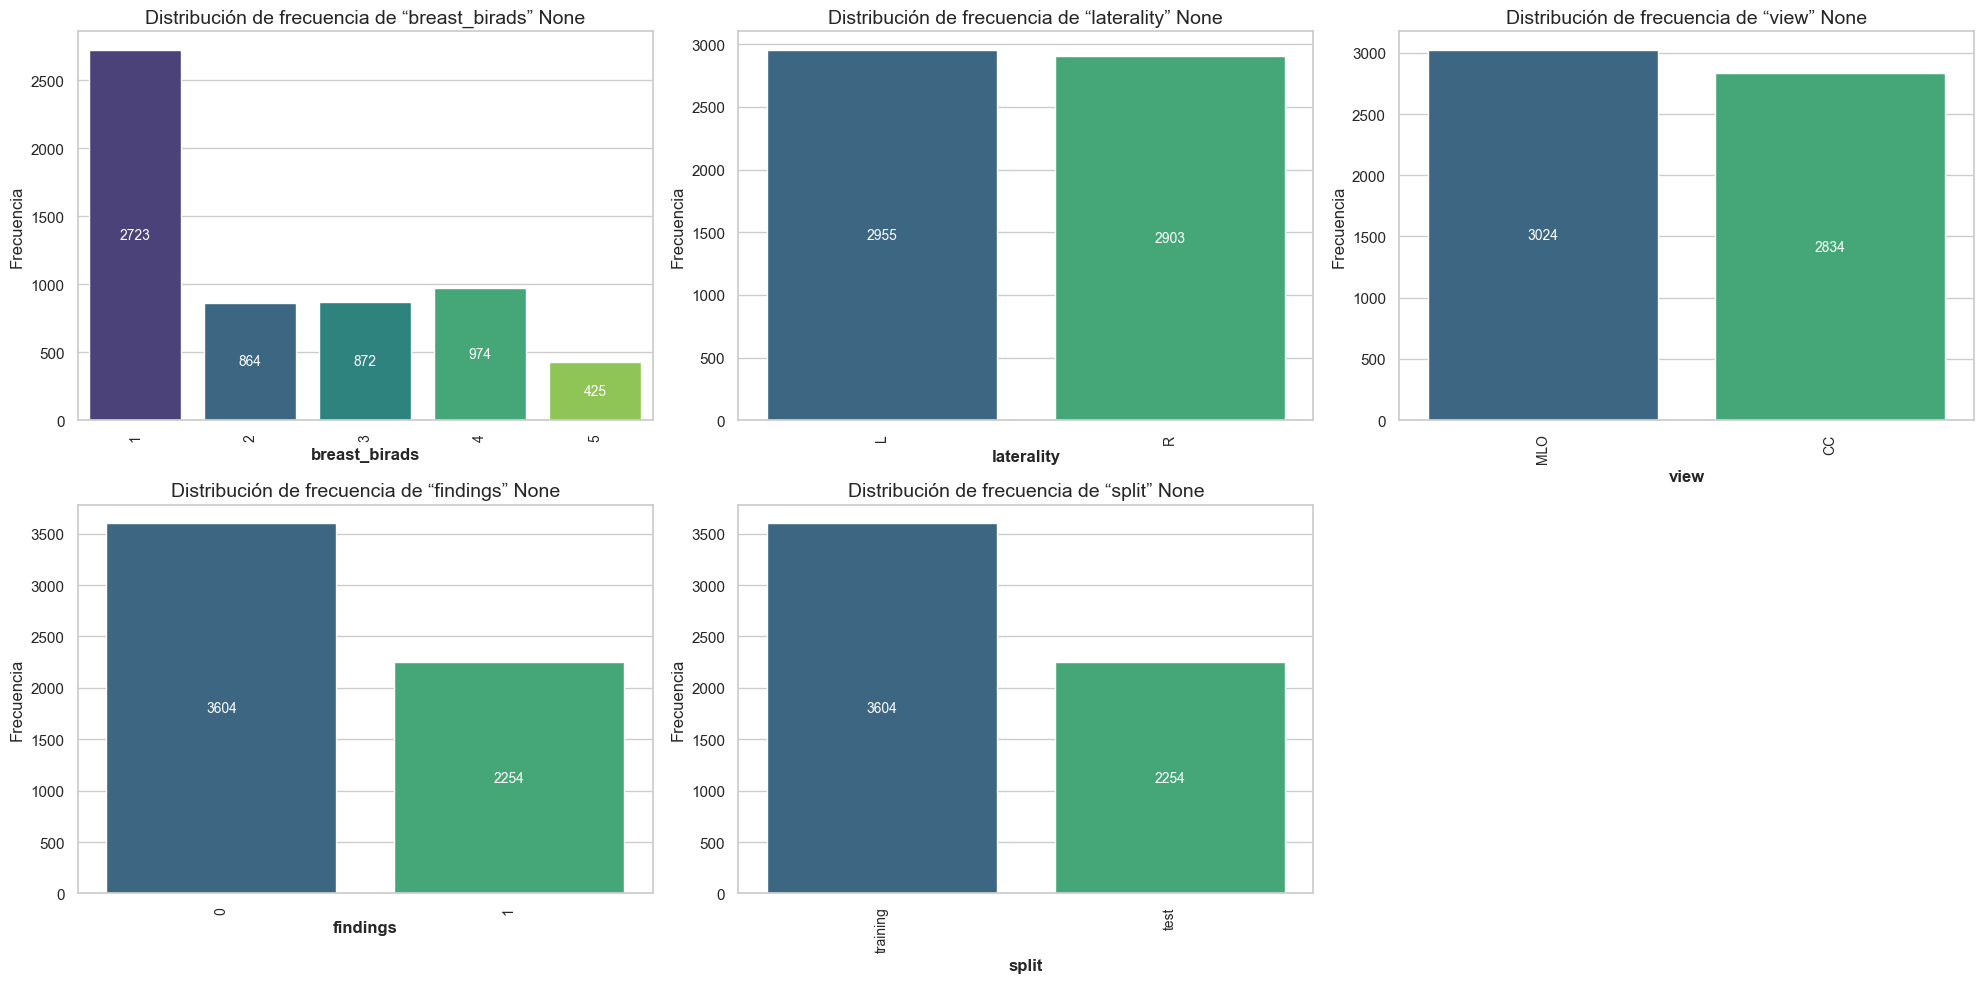

In [10]:
dataset_balanced_fixed = pd.concat([dataset_balanced_training_fix, dataset_balanced_test_fix], ignore_index=True)
dataset_balanced_fixed.stats()

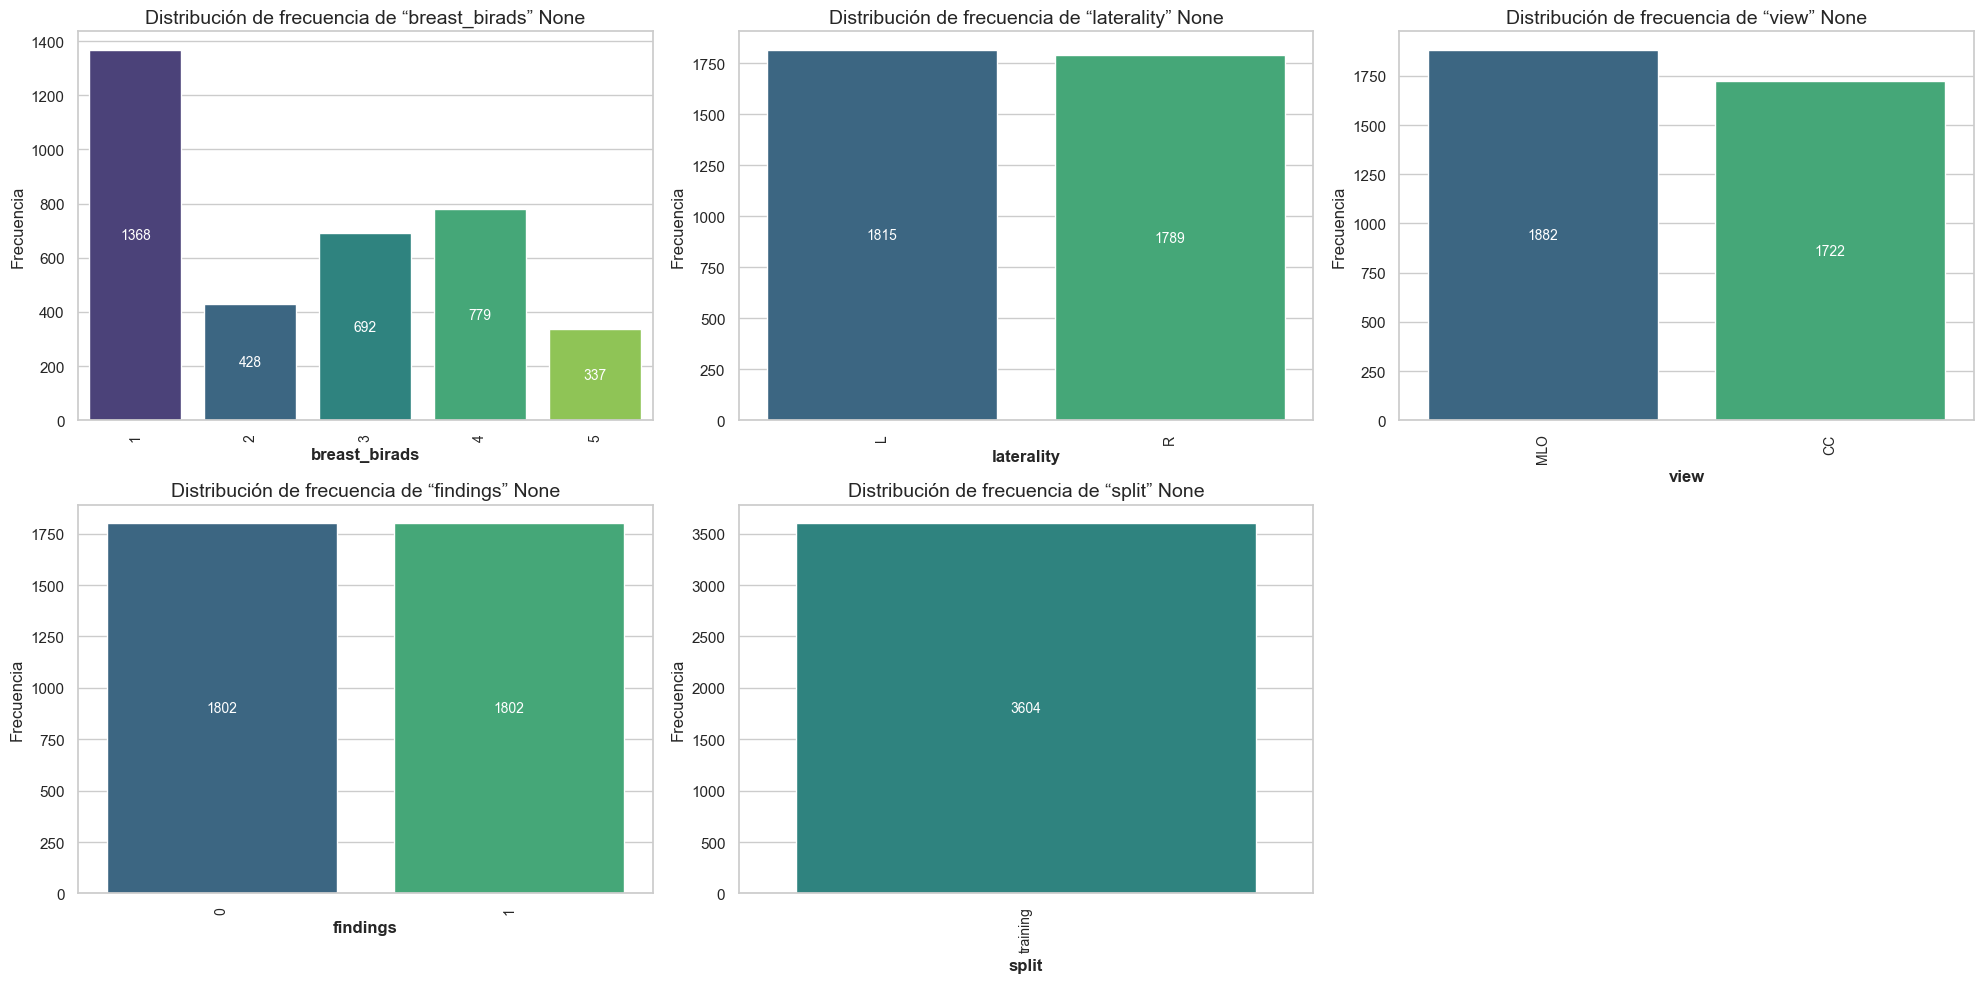

In [11]:
dataset_balanced_fixed[dataset_balanced_fixed["split"]=="training"].stats()

In [12]:
dataset_balanced_fixed.to_csv("dataset_balanced.csv", index=False)

In [13]:
dataset_balanced_fixed.preload_cache()
dataset_balanced_fixed.save_dump("dump_cache_balanced.npz")

Preloading cache: 100%|██████████| 5858/5858 [00:39<00:00, 146.85it/s]
